<a href="https://colab.research.google.com/github/Lanxin-Xiang/is765/blob/main/W3b_GloVe_with_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W3. GloVe with Gensim word vector visualization of various word vectors

Ref: Stanford cs224n

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive
# !mkdir -p is765
# !mkdir -p is765/data
%cd is765

/content/drive/MyDrive
/content/drive/MyDrive/is765


In [3]:
# !unzip a1

In [4]:
import numpy as np
import os

# Get the interactive Tools for Matplotlib
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os

Use the code below to download GloVe vectors. Or you can download manually from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

In [13]:
!wget -nc -P data/ https://nlp.stanford.edu/data/glove.6B.zip
!unzip -n data/glove.6B.zip -d data/Glove

File ‘data/glove.6B.zip’ already there; not retrieving.

Archive:  data/glove.6B.zip
  inflating: data/Glove/glove.6B.50d.txt  
  inflating: data/Glove/glove.6B.100d.txt  
  inflating: data/Glove/glove.6B.200d.txt  
  inflating: data/Glove/glove.6B.300d.txt  


I use the 300d vectors for better quality. If you try out the 50d or 100d vectors, they basically work for similarity but aren't as good for analogy problems. If you want better efficiency, change the `dim` to `100` to load the 100d vectors model.

100d: 1 min

300d: 3 min

In [14]:
dim = '300'
word2vec_file = os.getcwd() + "/data/Glove/glove.6B." + dim + "d.txt"
word2vec_glove_file = get_tmpfile("glove.6B." + dim + "d.word2vec.txt")
glove2word2vec(word2vec_file, word2vec_glove_file)

<ipython-input-14-cdcc228672b5>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(word2vec_file, word2vec_glove_file)


(400000, 300)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.most_similar('obama')

In [17]:
# Get similar words
model.most_similar('banana')

[('bananas', 0.6691170930862427),
 ('mango', 0.5804104208946228),
 ('pineapple', 0.5492372512817383),
 ('coconut', 0.5462778806686401),
 ('papaya', 0.541056752204895),
 ('fruit', 0.52181077003479),
 ('growers', 0.4877638816833496),
 ('nut', 0.48399588465690613),
 ('peanut', 0.48062023520469666),
 ('potato', 0.48061180114746094)]

In [18]:
# Get least similar words
model.most_similar(negative='banana')

[('kasson', 0.30769410729408264),
 ('boling', 0.3042016923427582),
 ('hazmi', 0.2930523157119751),
 ('fadli', 0.2912213206291199),
 ('bhatnagar', 0.29037898778915405),
 ('patner', 0.28239113092422485),
 ('nessler', 0.2814348042011261),
 ('kj/mol', 0.2788812518119812),
 ('mphasis', 0.2779490649700165),
 ('pattanaik', 0.2779349088668823)]

In [19]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6713


In [20]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [21]:
analogy('japan', 'japanese', 'australia')

'australian'

In [22]:
analogy('australia', 'beer', 'france')

'champagne'

In [23]:
analogy('obama', 'clinton', 'reagan')

'ronald'

In [24]:
analogy('tall', 'tallest', 'long')

'longest'

In [25]:
analogy('good', 'fantastic', 'bad')

'horrible'

In [26]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [27]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.key_to_index ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

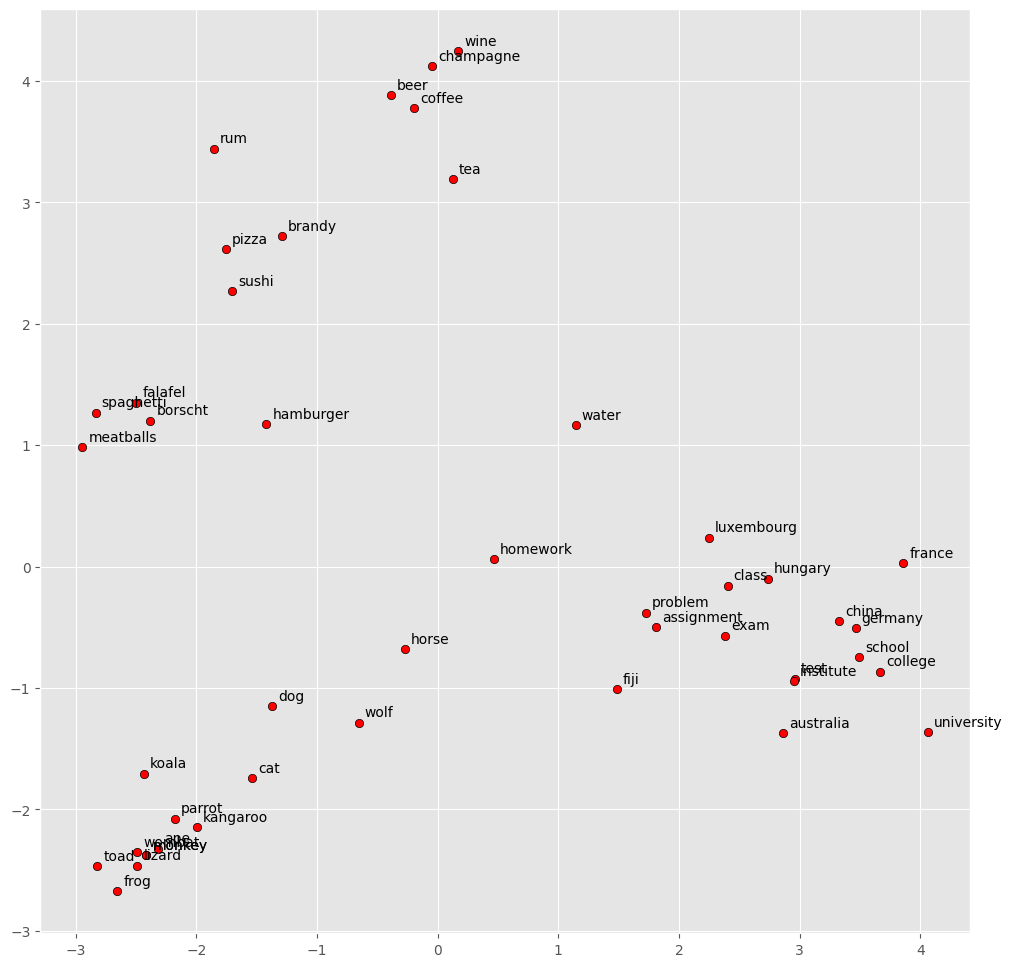

In [28]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

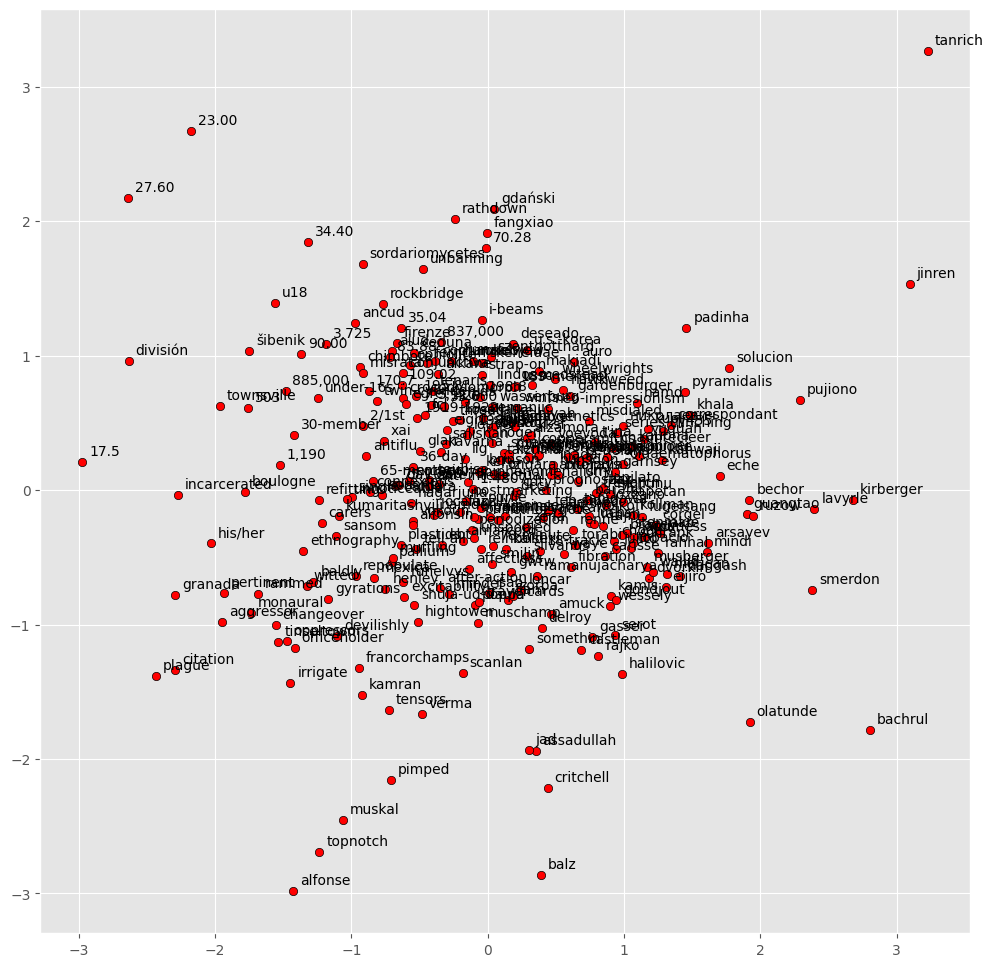

In [29]:
display_pca_scatterplot(model, sample=300)